In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Sneak Peak from Assignment 1

In [2]:
file_path = "/Users/pragathi/Nat Gas.csv"
date_column = "Dates"
date_format = "%m/%d/%y"
price_data = pd.read_csv(file_path,index_col=date_column,parse_dates=[date_column],date_format= date_format)

In [3]:
def adf_test(series):
    """
    # Using ADF test for stationarity
    # Null hypothesis: The lag distribution has unit root (Which implies the series is nonstationary)
    # Alternate hypothesis: Negation of null hypothesis 
    """
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    p_value = result[1]
    LOI = 0.05
    if(p_value <= LOI):
        print("Null hypothesis is rejected: The series is stationary")
    else:
        print("There is no enough evidence to reject the null hypothesis: The series is non stationary")

In [4]:
original_values = price_data['Prices'].values
adf_test(original_values)

ADF Statistic: 0.218077
p-value: 0.973257
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
There is no enough evidence to reject the null hypothesis: The series is non stationary


In [5]:
def log_transform(series):
    return np.log(series)

In [6]:
def sq_root(series):
    return np.sqrt(series)

In [7]:
def cube_root(series):
    return np.cbrt(series)

In [8]:
def differencing(series,period=2):
    return series.diff(periods=period)

In [9]:
lag_1_series = differencing(price_data['Prices'],1)
lag_1_series.fillna(0, inplace=True)
adf_test(lag_1_series)

ADF Statistic: -6.985702
p-value: 0.000000
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Null hypothesis is rejected: The series is stationary


<Axes: xlabel='Dates'>

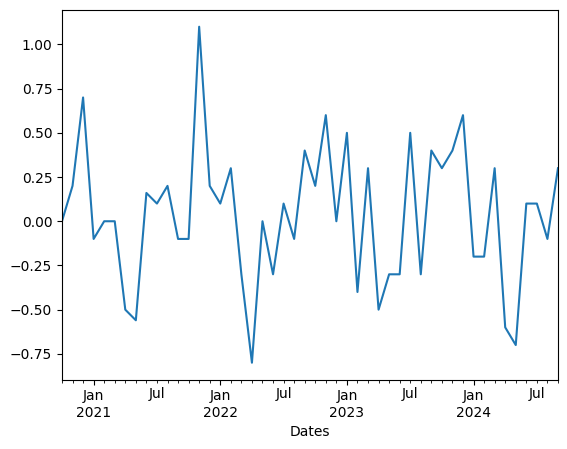

In [10]:
lag_1_series.plot()

In [11]:
p = 10  # Order of autoregression
d = 0   # Order of differencing
q = 0  # Order of moving average
model = ARIMA(price_data['Prices'], order=(p, d, q))
results = model.fit()

# Forecast future values
n_forecast = 10  # Number of periods to forecast
forecast = results.get_forecast(steps=n_forecast)

/Users/pragathi/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/pragathi/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/pragathi/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


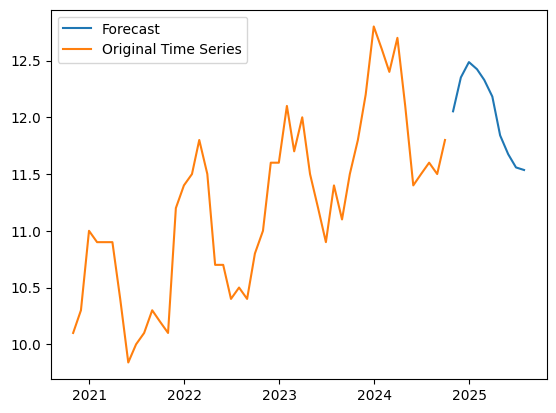

In [12]:
plt.plot(list(forecast.tvalues.index), forecast.predicted_mean, label='Forecast')
plt.plot(price_data['Prices'], label='Original Time Series')
plt.legend()
plt.show()

# Assignment 2 - Pricing the contract

## Input paramters 
1. Injection dates. 
2. Withdrawal dates.
3. The prices at which the commodity can be purchased/sold on those dates.
4. The rate at which the gas can be injected/withdrawn.
5. The maximum volume that can be stored.
6. Storage costs.

In [18]:
def price_contract(inject_date, withdraw_date, max_vol,storage_cost):
    inject_date = datetime.strptime(inject_date, '%Y-%m-%d')
    withdraw_date = datetime.strptime(withdraw_date,'%Y-%m-%d')
    return (forecast.predicted_mean[withdraw_date] - forecast.predicted_mean[inject_date])*max_vol - storage_cost*max_vol

In [19]:
if __name__ == "__main__":
    print("The value of the contract is: ",price_contract("2024-11-30","2025-02-28",1000000,15))

The value of the contract is:  -15022222.529126646
